ライブラリのインポートが完了しました。

論文掲載用のプロットスタイルが適用されました。

SNR温度スイープ実験を開始します。

--------------------------------------------------
--- 解析開始: T = 0.001 ---
  - ファイル '3d_ol_T0.001_A1.0_omega0.2_raw.csv' の読み込みに成功。
  - 計算完了: SNR = 5.90 dB

--------------------------------------------------
--- 解析開始: T = 0.100 ---
  - ファイル '3d_ol_T0.1_A1.0_omega0.2_raw.csv' の読み込みに成功。
  - 計算完了: SNR = -0.35 dB

--------------------------------------------------
--- 解析開始: T = 1.000 ---
  - ファイル '3d_ol_T1.0_A1.0_omega0.2_raw.csv' の読み込みに成功。
  - 計算完了: SNR = 4.55 dB

【3D SNR温度スイープ実験 結果サマリー】
   Temperature  SNR (dB)
0        0.001  5.903881
1        0.100 -0.346146
2        1.000  4.550769

結果サマリーを 'M5_summary_3D_SNR_vs_Temp.csv' として保存しました。

最終プロットを 'M5_Fig4_3D_SNR_vs_Temperature_EN.pdf' として保存しました。


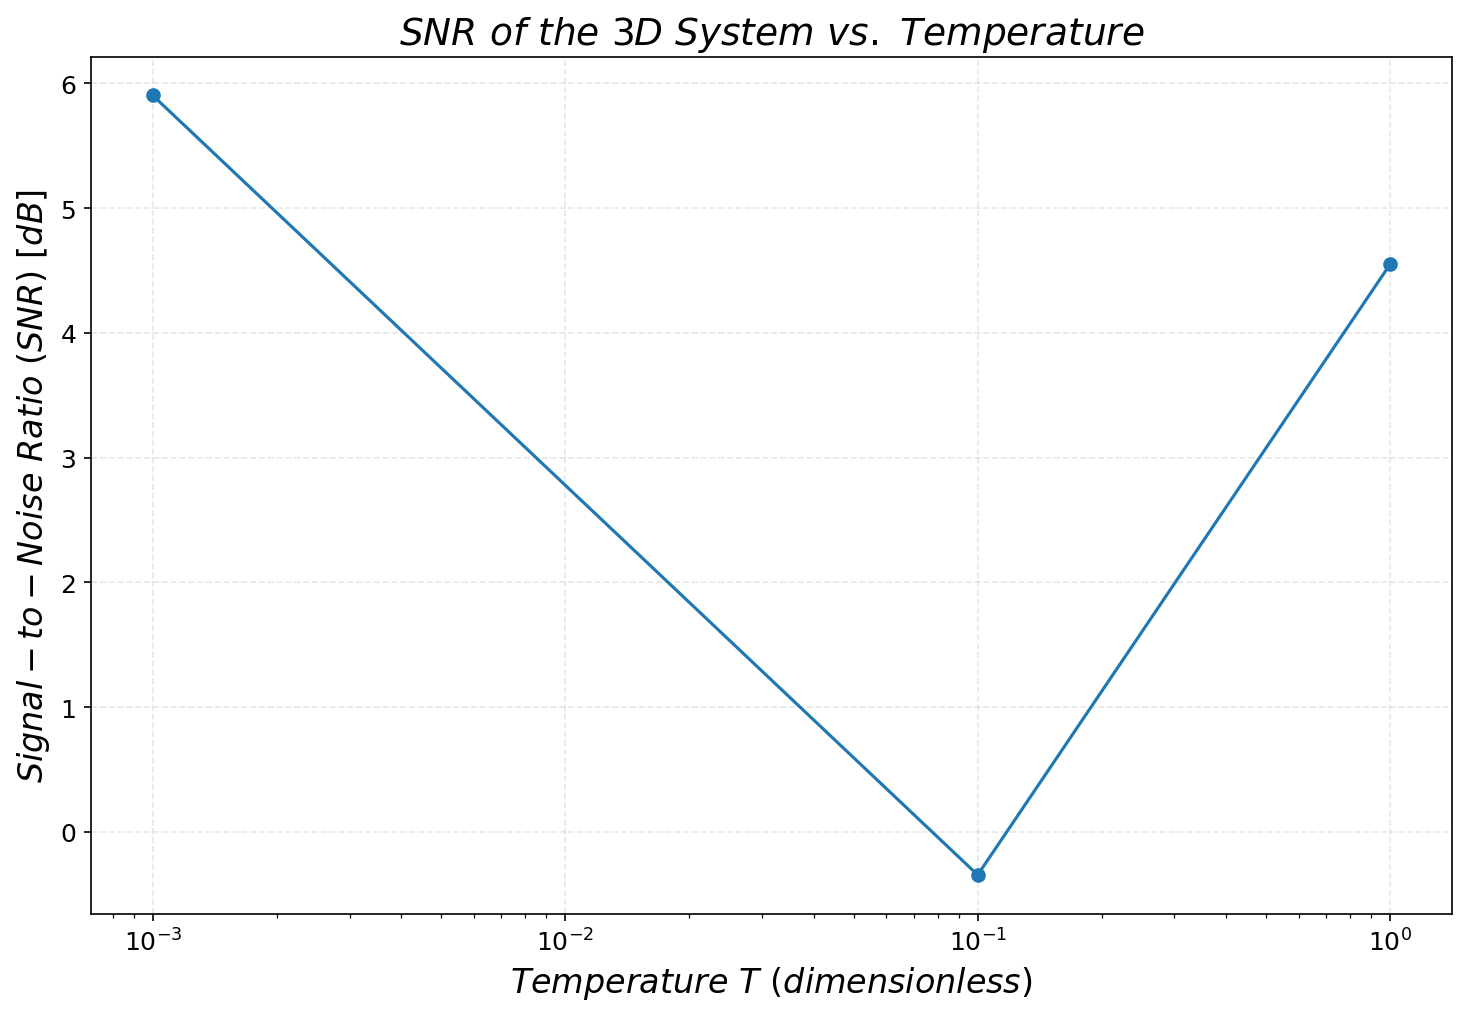


【成果物の保存に関するご確認】

1. Google Colabノートブック（.ipynbファイル）について:
   - 対象ファイル: M5_02_3D_SNR_vs_Temp_v1.ipynb
   - 指示: このノートブックを、以下のフォルダに「新規保存」してください。
   - 保存先フォルダ: CoupledFieldD3D_Research_V7_20250828/01_src/analysis/

2. 生成されたデータファイル（.csvファイル）について:
   - 対象ファイル: M5_summary_3D_SNR_vs_Temp.csv
   - 指示: Colabからこのファイルをダウンロードし、以下のフォルダに保存してください。
   - 保存先フォルダ: CoupledFieldD3D_Research_V7_20250828/03_results/tables/

3. 生成されたビジュアル画像データ（.pdfファイル）について:
   - 対象ファイル: M5_Fig4_3D_SNR_vs_Temperature_EN.pdf
   - 指示: Colabからこのファイルをダウンロードし、以下のフォルダに保存してください。
   - 保存先フォルダ: CoupledFieldD3D_Research_V7_20250828/03_results/figures/M2_3D_Core/


In [4]:
# =============================================================================
# M5_02_3D_SNR_vs_Temp_v1.ipynb
#
# 目的:
# 3Dオープンループ同定で得られた、異なる3つの温度条件の時系列データから、
# それぞれのSNRを計算し、SNRの温度依存性を明らかにする。
# 1. 3つの温度点に対応するCSVデータを読み込む。
# 2. 各データセットに対してSNRを計算する。
# 3. 結果をサマリー表にまとめる。
# 4. 横軸を温度、縦軸をSNR(dB)とした最終プロットを生成し、保存する。
# =============================================================================

# === セル 1: ライブラリのインポート ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print("ライブラリのインポートが完了しました。")

# --- 2. 論文掲載用のプロットスタイルガイドを定義 ---
plot_style_en = {
    'font.family': 'sans-serif', 'font.sans-serif': ['Helvetica', 'Arial', 'DejaVu Sans'],
    'font.size': 14, 'axes.labelsize': 16, 'axes.titlesize': 18,
    'xtick.labelsize': 12, 'ytick.labelsize': 12, 'legend.fontsize': 14,
    'figure.figsize': (10, 7), 'figure.dpi': 150,
    'axes.grid': True, 'grid.alpha': 0.3, 'grid.linestyle': '--',
    'pdf.fonttype': 42, 'ps.fonttype': 42
}
plt.rcParams.update(plot_style_en)
print("\n論文掲載用のプロットスタイルが適用されました。")


# --- 3. データのアップロードと解析の準備 ---
# 【先生へのお願い】
# Google Colabの左側にあるフォルダアイコンから、以下の3つのCSVファイルをアップロードしてください:
# - 3d_ol_T0.001_A1.0_omega0.2_raw.csv
# - 3d_ol_T0.1_A1.0_omega0.2_raw.csv
# - 3d_ol_T1.0_A1.0_omega0.2_raw.csv

# --- 解析する温度と、それに対応するファイル名のリスト ---
temperatures_to_analyze = [0.001, 0.1, 1.0]
base_filename = "3d_ol_T{temp}_A1.0_omega0.2_raw.csv"

# --- 固定パラメータ ---
omega_drive = 0.2
dt = 1e-3

# --- 結果を保存するためのリスト ---
results = []

print("\nSNR温度スイープ実験を開始します。")


# --- 4. 各温度データに対するループ処理 ---
all_files_found = True
for temp in temperatures_to_analyze:
    filename = base_filename.format(temp=temp)
    print("\n" + "-"*50)
    print(f"--- 解析開始: T = {temp:.3f} ---")

    try:
        df = pd.read_csv(filename)
        print(f"  - ファイル '{filename}' の読み込みに成功。")

        # --- SNR計算 ---
        t = df['time'].values
        Ffb = df['F_feedback'].values
        N_samples = len(t)
        fft_Ffb = np.fft.fft(Ffb)
        freq = np.fft.fftfreq(N_samples, d=dt)
        omega = 2 * np.pi * freq
        power_spec_Ffb = np.abs(fft_Ffb)**2
        positive_freq_mask = freq > 0
        omega_pos = omega[positive_freq_mask]
        power_spec_pos = power_spec_Ffb[positive_freq_mask]

        signal_idx = np.argmin(np.abs(omega_pos - omega_drive))
        signal_power = power_spec_pos[signal_idx]

        noise_mask = (
            (omega_pos > omega_drive + 5 * (omega_pos[1]-omega_pos[0])) &
            (omega_pos < omega_drive + 25 * (omega_pos[1]-omega_pos[0]))
        )
        noise_power = np.mean(power_spec_pos[noise_mask])

        snr = signal_power / noise_power
        snr_db = 10 * np.log10(snr)

        results.append({'Temperature': temp, 'SNR (dB)': snr_db})
        print(f"  - 計算完了: SNR = {snr_db:.2f} dB")

    except FileNotFoundError:
        print(f"  - エラー: ファイル '{filename}' が見つかりません。")
        all_files_found = False
        break

if all_files_found:
    # --- 5. 結果の集約と表示 ---
    results_df = pd.DataFrame(results)
    print("\n" + "="*50)
    print("【3D SNR温度スイープ実験 結果サマリー】")
    print(results_df)

    summary_csv_filename = "M5_summary_3D_SNR_vs_Temp.csv"
    results_df.to_csv(summary_csv_filename, index=False)
    print(f"\n結果サマリーを '{summary_csv_filename}' として保存しました。")


    # --- 6. 最終プロットの生成とPDF保存 ---
    fig, ax = plt.subplots(figsize=plot_style_en['figure.figsize'])

    ax.plot(results_df['Temperature'], results_df['SNR (dB)'], marker='o', linestyle='-')

    ax.set_xlabel(r'$Temperature\ T\ (dimensionless)$')
    ax.set_ylabel(r'$Signal-to-Noise\ Ratio\ (SNR)\ [dB]$')
    ax.set_title(r'$SNR\ of\ the\ 3D\ System\ vs.\ Temperature$')
    ax.set_xscale('log') # 温度は対数スケールでプロット

    plt.tight_layout()

    pdf_filename = "M5_Fig4_3D_SNR_vs_Temperature_EN.pdf"
    plt.savefig(pdf_filename, bbox_inches='tight')
    print(f"\n最終プロットを '{pdf_filename}' として保存しました。")

    plt.show()

    # --- 7. 保存手順の最終確認明示 ---
    print("\n" + "="*60)
    print("【成果物の保存に関するご確認】")
    print("\n1. Google Colabノートブック（.ipynbファイル）について:")
    print(f"   - 対象ファイル: M5_02_3D_SNR_vs_Temp_v1.ipynb")
    print(f"   - 指示: このノートブックを、以下のフォルダに「新規保存」してください。")
    print(f"   - 保存先フォルダ: CoupledFieldD3D_Research_V7_20250828/01_src/analysis/")
    print("\n2. 生成されたデータファイル（.csvファイル）について:")
    print(f"   - 対象ファイル: {summary_csv_filename}")
    print(f"   - 指示: Colabからこのファイルをダウンロードし、以下のフォルダに保存してください。")
    print(f"   - 保存先フォルダ: CoupledFieldD3D_Research_V7_20250828/03_results/tables/")
    print("\n3. 生成されたビジュアル画像データ（.pdfファイル）について:")
    print(f"   - 対象ファイル: {pdf_filename}")
    print(f"   - 指示: Colabからこのファイルをダウンロードし、以下のフォルダに保存してください。")
    print(f"   - 保存先フォルダ: CoupledFieldD3D_Research_V7_20250828/03_results/figures/M2_3D_Core/")
    print("="*60)

else:
    print("\n必要なCSVファイルが見つからなかったため、処理を中断しました。")